## Get user id list and count

In [1]:
# use shell script to count unique id(large file, could be slow)
# action at this part: extract the unique uid in the all_play_log file and count the number of each uid, 
# then sort the uid small to large, output to the uid_count.csv
import os
cmd = """
export LC_CTYPE=C
export LANG=C
# get uid field| sort | count unique ids | strip blank spaces | output to file
cat ../data/play/all_play_log| cut -f1 -d$'\t' | sort | uniq -c | sed -e 's/^ *//g;s/ *$//g'> ../data/uid_count.csv
"""
os.system(cmd)

0

In [2]:
import numpy as np
import pandas as pd
os.getcwd()

'/Users/caden/Desktop/music_box_project/code'

In [52]:
# count is the number of play time each user
df = pd.read_csv('../data/uid_count.csv', sep = '\s+', names = ['count', 'uid'], header = 0)

In [54]:
df.head()

486451

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486451 entries, 0 to 486450
Data columns (total 2 columns):
count    486451 non-null int64
uid      486451 non-null int64
dtypes: int64(2)
memory usage: 7.4 MB


In [6]:
df.describe()

,count,uid
count,4.864510e+05,4.864510e+05
mean,2.910379e+02,1.671968e+08
std,1.675206e+04,1.091554e+07
min,1.000000e+00,0.000000e+00
25%,1.400000e+01,1.679500e+08
50%,6.000000e+01,1.683271e+08
75%,2.220000e+02,1.686766e+08
max,7.439499e+06,1.692623e+08


## Remove bots and outliers

In [7]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

Text(0.5,0,'user # plays (10^n)')

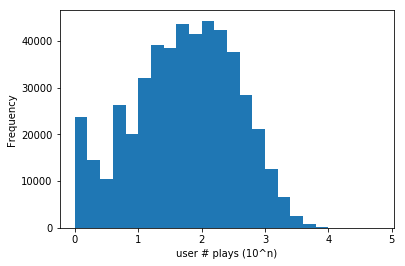

In [17]:
# since the hist of count is skew long tail
np.log10(df['count']).plot.hist(bins=np.arange(0,5,0.2))
plt.xlabel("user # plays (10^n)")

In [27]:
top_count_threshold = np.percentile(df['count'],99.9)
print(top_count_threshold)

5523.550000000047


In [28]:
print("total number of users:",len(df['uid']))

total number of users: 486451


In [29]:
# remove bots: get id with play counts<top_count_threshold
id_list_bot_removed = np.array(df['uid'][df['count']<top_count_threshold].dropna())

In [30]:
print("total number of users after bot removed:",len(id_list_bot_removed))

total number of users after bot removed: 485964


# Apply downsample on uid level

In [39]:
# downsample ids
np.random.seed = 1
down_sample_ratio = 0.1
# one way to make a mask
# get a set of number uniformaly between 0-1 which size is the same as the uid set, choose the number less than 0.1.
# then we can get the 10% of the uid set
id_subset = set(id_list_bot_removed[np.random.random(id_list_bot_removed.shape)<down_sample_ratio])

In [50]:
print("total number of users after down sample:",len(id_subset))

total number of users after down sample: 48542


In [42]:
# convert data into version used in python
import datetime
def convert_date(s):
    # remove the whitespace characters of string
    s = str(s).strip()
    try:
        year = int(s[:4])
        month = int(s[4:6])
        day = int(s[6:8])
        return datetime.date(year,month,day)
    except:
        return None

In [ ]:
import csv
input_file = '../data/play/all_play_log'
output_file = '../data/play_ds.csv'
input_file_list = ['uid', 'device', 'song_id', 'song_type', 'song_name', 'singer', 'play_time', 'song_length', 'paid_flag', 'date']
output_file_list = ['uid', 'device', 'song_id', 'date', 'play_time', 'song_length']
i = 0
with open(input_file, 'r', encoding = 'latin-1') as fin, open(output_file, 'w') as fout:
    csvin = csv.DictReader(fin, delimiter = '\t', filednames = input_filed_list, quoting = csv.QUITE_NONE)
    csvout = csv.writer(fout, delimiter = ',')
    csvout.writerow(output_filed_list)
    for row in csvin:
        i += 1
        if i%1000000 == 0:
            print('#row processed:', i)
        try:
            int(row['uid'])
        except:
            continue
        if int

In [47]:
# there are some strange values in play_time, use this to check out
input_file = '../data/play/all_play_log'
input_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
with open(input_file,'r',encoding='latin-1') as fin:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    for row in csvin:
        if int(row['uid']) == 96303246:
            print(row['play_time'])

14>=(223.104.18.209)TM
14>(223.104.18.209)TM
29>=(223.104.18.209)TM
8>}(223.104.18.209)TM
4>=(223.104.18.209)TM
13>=(223.104.18.209)TM
1>(223.104.18.209)TM
4>=(223.104.18.209)TM
14>}(223.104.18.209)TM
3>(223.104.18.209)TM
20>}(223.104.18.209)TM


ValueError: invalid literal for int() with base 10: ''

In [43]:
# down sample play by uid
import csv
input_file = '../data/play/all_play_log'
output_file = '../data/play_ds.csv'
input_field_list = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag','date']
output_field_list = ['uid','device','song_id','date','play_time','song_length']
i=0
# the action using with will be closed after finishing
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    # put a cover upon fin to read
    # use DictReader can revert fin as a dict with key and vlues
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    # put a cover upon fout to write, use ',' as delimiter
    csvout = csv.writer(fout,delimiter=',')
    # write the header into the output file
    csvout.writerow(output_field_list)
    for row in csvin:
        #record the number of process
        i+=1 
        if i%1000000==0:
            print("#row processed:",i)
        # if the uid of this row is not a int, then drop this row process the next row        
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                # write corresponding features from intput fiel into output file
                csvout.writerow([str(row[key]).strip() for key in output_field_list])

#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000
#row processed: 8000000
#row processed: 9000000
#row processed: 10000000
#row processed: 11000000
#row processed: 12000000
#row processed: 13000000
#row processed: 14000000
#row processed: 15000000
#row processed: 16000000
#row processed: 17000000
#row processed: 18000000
#row processed: 19000000
#row processed: 20000000
#row processed: 21000000
#row processed: 22000000
#row processed: 23000000
#row processed: 24000000
#row processed: 25000000
#row processed: 26000000
#row processed: 27000000
#row processed: 28000000
#row processed: 29000000
#row processed: 30000000
#row processed: 31000000
#row processed: 32000000
#row processed: 33000000
#row processed: 34000000
#row processed: 35000000
#row processed: 36000000
#row processed: 37000000
#row processed: 38000000
#row processed: 39000000
#row processed: 40000000
#row proc

In [44]:
# down sample download by uid
import csv
input_file = '../data/down/all_down_log'
output_file = '../data/down_ds.csv'
input_field_list = ['uid','device','song_id','song_name','singer','paid_flag','date']
output_field_list = ['uid','device','song_id','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])


#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000


In [45]:
# down sample search by uid  
import csv
input_file = '../data/search/all_search_log'
output_file = '../data/search_ds.csv'
input_field_list = ['uid','device','time_stamp','search_query','date']
output_field_list = ['uid','device','date']
i=0
with open(input_file,'r',encoding='latin-1') as fin, open(output_file,'w') as fout:
    csvin = csv.DictReader(fin,delimiter='\t',fieldnames=input_field_list,quoting=csv.QUOTE_NONE)
    csvout = csv.writer(fout,delimiter=',')
    csvout.writerow(output_field_list) # write header
    for row in csvin:
        i+=1
        if i%1000000==0:
            print("#row processed:",i)
        try:
            int(row['uid'])
        except:
            continue
        if int(row['uid']) in id_subset:
            row['date'] = convert_date(row['date'])
            if row['date'] != None: 
                csvout.writerow([str(row[key]).strip() for key in output_field_list])


#row processed: 1000000
#row processed: 2000000
#row processed: 3000000
#row processed: 4000000
#row processed: 5000000
#row processed: 6000000
#row processed: 7000000


# Create event table for feature generation

In [48]:
# merge three csv into one and mark the resource
play_file = '../data/play_ds.csv'
down_file = '../data/down_ds.csv'
search_file = '../data/search_ds.csv'
output_file = '../data/event_ds.csv'
play_field_list = ['uid','device','song_id','date','play_time','song_length']
down_field_list = ['uid','device','song_id','date']
search_field_list = ['uid','device','date']
output_field_list = ['uid','event','song_id','date']
with open(play_file,'r') as f_play, open(down_file,'r') as f_down, \
open(search_file,'r') as f_search,open(output_file,'w') as f_out:
    csvplay = csv.DictReader(f_play,delimiter=',')
    csvdown = csv.DictReader(f_down,delimiter=',')
    csvsearch = csv.DictReader(f_search,delimiter=',')
    csvout = csv.writer(f_out,delimiter=',')
    csvout.writerow(output_field_list) # write header
    # record the current process csv
    print('Processing play ...')
    for row in csvplay:
        row['event'] = 'P'
        row['date']
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing down ...')
    for row in csvdown:
        row['event'] = 'D'
        csvout.writerow([row[key] for key in output_field_list])
    print('Processing search ...')
    for row in csvsearch:
        row['event'] = 'S'
        csvout.writerow([row.get(key,'') for key in output_field_list])


Processing play ...
Processing down ...
Processing search ...
